In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from Optimization.PreparedData import X_train, X_valid, y_train, y_valid, X_test
from sklearn.metrics import roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix
from matplotlib.gridspec import GridSpec
from xgboost import XGBClassifier

In [2]:
df1 = pd.read_csv('metrics/gbtree/Optuna/metrics_2026-01-17 21:58:02.446496.csv')

current_time = datetime.now()

In [3]:
time = np.arange(0, df1.shape[0], 1)

acc1 = df1['accuracy']
prec1 = df1['precision']
rec1 = df1['recall']
f11 = df1['f1']
lr1 = df1['learning curve']
gini1 = df1['gini']

metrics_optuna = [('Accuracy', acc1),
           ('Precision', prec1),
           ('Recall', rec1),
           ('F1', f11),
           ('Learning Curve', lr1),
           ('Normalized Gini Coeff', gini1)]

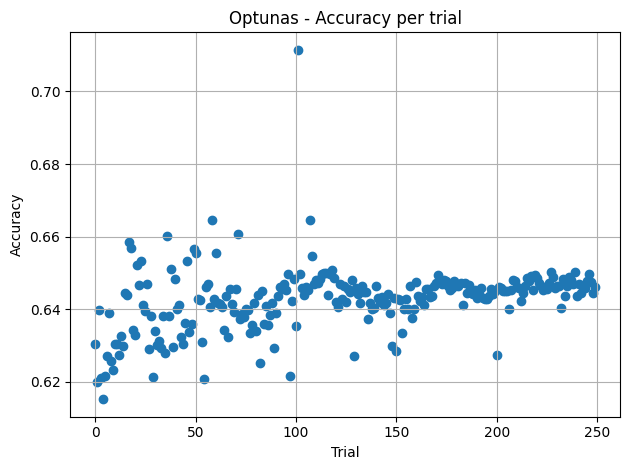

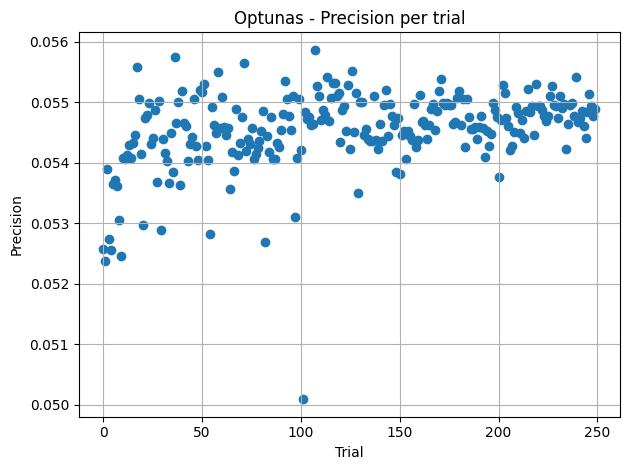

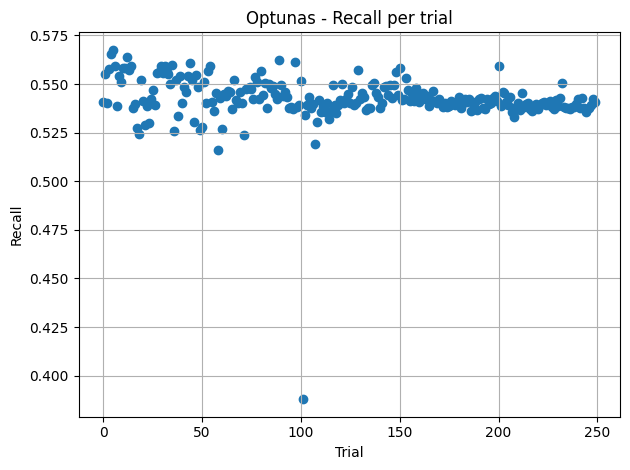

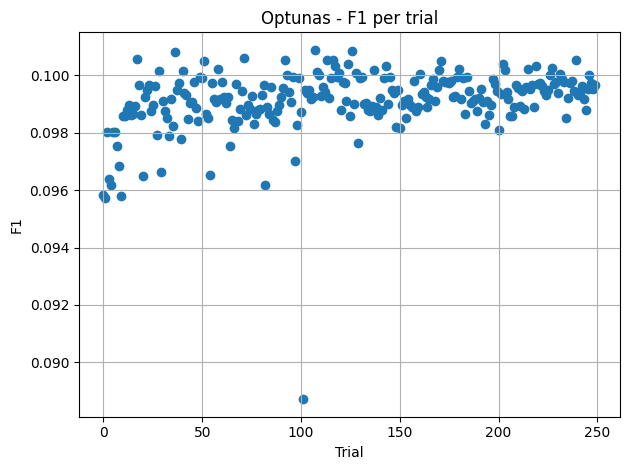

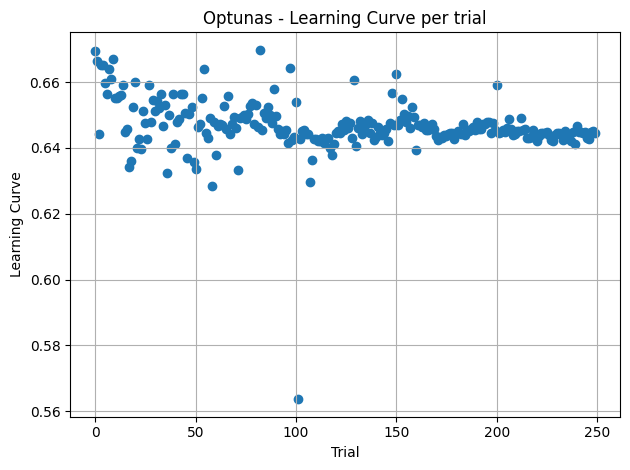

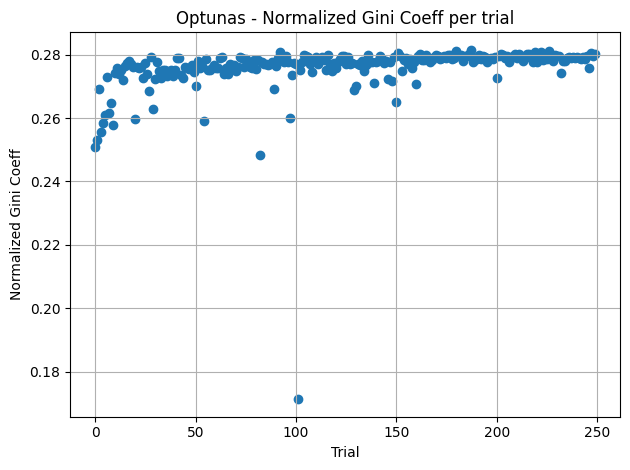

In [4]:
for metric_tuple in metrics_optuna:
    metric_name, metric_vector1 = metric_tuple[0], metric_tuple[1]
    plt.figure()
    plt.scatter(time, metric_vector1)
    plt.title(f'Optunas - {metric_name} per trial')
    plt.ylabel(metric_name)
    plt.xlabel('Trial')
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'plots/gbtree/Optuna/{metric_name}_{current_time}.png')

In [4]:
optuna_opt_hyp1 = pd.read_json('metrics/gbtree/Optuna/best_params_2026-01-17 21:58:02.446496.json')

In [5]:
params = {
    "n_estimators": int(optuna_opt_hyp1['value'].values[2]),
    "max_depth": int(optuna_opt_hyp1['value'].values[4]),
    "eta": optuna_opt_hyp1['value'].values[3],
    "lambda": optuna_opt_hyp1['value'].values[0],
    "alpha": optuna_opt_hyp1['value'].values[1],
    "subsample": optuna_opt_hyp1['value'].values[5],
    "colsample_bytree": optuna_opt_hyp1['value'].values[6],
    "gamma": optuna_opt_hyp1['value'].values[8],
    "min_child_weight": int(optuna_opt_hyp1['value'].values[7])
    }


scale_pos_weight = (sum(y_train == 0) / sum(y_train == 1))
threshold = 0.5

xgb = XGBClassifier(objective = 'binary:logistic',
                    random_state = 0,
                    tree_method = 'hist',
                    booster = 'gbtree',
                    scale_pos_weight = scale_pos_weight,
                    **params)

xgb.fit(X_train, y_train)

y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= threshold).astype(int)

In [6]:
sample_submission = pd.read_csv('datasets/sample_submission.csv')

sample_submission['target'] = y_proba
sample_submission.to_csv('datasets/sample_submission_Optuna.csv', index = False)